In [1]:
#项目5-项目实施代码
#导入os模块
import os

#获取正常邮件和垃圾邮件的文件列表
#normalFileList=os.listdir("../item5/item5-ss-data/normal/")
#4705011《机器学习基础及应用》素材与实例309-3（谭立新）2023-3-22/配套素材—程序源代码与对应数据集/数据集/item5/item5-ss-data
normalFileList=os.listdir("item5-ss-data/normal")
spamFileList=os.listdir("item5-ss-data/spam")
#spamFileList=os.listdir("../item5/item5-ss-data/spam/")
print("正常邮件的文件名字列表",normalFileList)
print("垃圾邮件的文件名字列表",spamFileList)
#获取停用词表，用于对停用词进行过滤
stopList=[]   #存放停用词
for line in open("item5-ss-data/stopwords.txt",encoding='utf-8'):
    stopList.append(line[:len(line)-1]) # [0，n-1): 0~n-2;  line[-1]='\n'
print("停用词文件内容：",stopList)

正常邮件的文件列表 ['normal-mail1.txt', 'normal-mail2.txt', 'normal-mail3.txt', 'normal-mail4.txt', 'normal-mail5.txt', 'normal-mail6.txt', 'normal-mail7.txt', 'normal-mail8.txt', 'normal-mail9.txt']
垃圾邮件的文件列表 ['spam-mail1.txt', 'spam-mail2.txt', 'spam-mail3.txt', 'spam-mail4.txt', 'spam-mail5.txt', 'spam-mail6.txt', 'spam-mail7.txt', 'spam-mail8.txt', 'spam-mail9.txt']
11
停用词文件内容： ['啊', '阿', '哎', '哎呀', '唉', '于是', '还']


In [1]:
#导入需要的库
# !pip install jieba
from jieba import cut#导入中文分词库（结巴分词）
from re import sub

#定义getWords()函数，用于提取指定文件（邮件文件）的词语
def getWords(file,stopList):
    wordsList=[]
    for line in open(file,encoding='utf-8'):
        line=line.strip() #移除字符串头尾指定的字符（默认为空格或换行符）或字符序列
        #过滤干扰字符或无效字符
        line=sub(r'[.【】0-9、——，。！\~*]','',line)  
        line=cut(line)
        #过滤长度为1的单个字
        line=filter(lambda word:len(word)>1,line) 
        wordsList.extend(line)
        #过滤停用词，剩余有效词语
        words=[]
        for i in wordsList:
            if i not in stopList and i.strip()!='' and i!=None:
                words.append(i)
    return words

In [4]:
#提取训练集所有文件中的词语与出现频次最高的前10个词语

#导入需要的库
from collections import Counter
from itertools import chain

#提取训练集所有文件中的词语
allwords=[]
for spamfile in spamFileList:
    words=getWords("item5-ss-data/spam/"+spamfile,stopList)
    allwords.append(words)
for normalfile in normalFileList:
    words=getWords("item5-ss-data/normal/"+normalfile,stopList)
    allwords.append(words)
print("训练集中所有的有效词语列表：")
print(allwords)

#提取训练集中出现频次最高的前10个词语
frep=Counter(chain(*allwords))  #获取有效词语出现的频次
topTen=frep.most_common(10)#获取出现频次最高的前10个词语和对应的频次
topWords=[w[0] for w in topTen] #获取出现频次最高的前10个词语
print("训练集中出现频次最高的前10个词语:")
print(topWords)


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.638 seconds.
Prefix dict has been built successfully.


训练集中所有的有效词语列表：
[['期刊', '主要', '栏目', '技术', '应用', '投稿', '邮箱', 'xx', 'com'], ['期刊', '主要', '栏目', '数据', '投稿', '邮箱', 'xx', 'com'], ['某某', '期刊', '主要', '栏目', '数据', '投稿', '邮箱', 'xx', 'com'], ['期刊', '主要', '栏目', '计算', '投稿', '邮箱', 'xx', 'com'], ['期刊', '主要', '栏目', '人工智能', '投稿', '邮箱', 'xx', 'com'], ['期刊', '主要', '栏目', '网络设备', '投稿', '邮箱', 'xx', 'com'], ['期刊', '主要', '栏目', '计算机', '基础', '投稿', '邮箱', 'xx', 'com'], ['期刊', '主要', '栏目', '网络', '制图', '投稿', '邮箱', 'xx', 'com'], ['期刊', '主要', '栏目', '网站', '绘图', '投稿', '邮箱', 'xx', 'com'], ['张老师', '您好', '上次', '推荐', '资料', '来说', '帮助', '很大', '希望', '推荐', '一些', '资料', '非常感谢'], ['小李', '你好', '论文', '需要', '修改', '具体', '修改意见', '附件', '查收'], ['李老师', '您好', '论文', '已经', '修改', '修改', '完成', '内容', '附件', '查收'], ['小李', '你好', '论文', '需要', '修改', '具体', '修改意见', '附件', '查收'], ['小张', '你好', '论文', '需要', '修改', '具体', '修改意见', '附件', '查收'], ['张老师', '您好', '论文', '修改', '具体内容', '附件', '查收'], ['李老师', '你好', '论文', '修改', '中等', '修改', '完成', '沟通'], ['小张', '你好', '论文', '需要', '修改', '具体', '修改意见', '附件', '查收'], ['小张', '你好', '

In [5]:
#获取10个高频词语在每封邮件中出现的次数
#导入需要的库
import numpy as np

vector=[]
for words in allwords:
    temp=list(map(lambda x:words.count(x),topWords)) #每个高频词语在每封邮件中出现的次数
    vector.append(temp)
vector=np.array(vector)
print("10个高频词语在每封邮件中出现的次数：")
print(vector)

10个高频词语在每封邮件中出现的次数：
[[0 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 1]
 [2 0 0 0 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 0 1 1]
 [2 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 0 1 1]]


In [6]:
#使用朴素贝叶斯算法训练模型
from sklearn.naive_bayes import MultinomialNB

#为数据集打标签，1表示垃圾邮件，0表示正常邮件
target=np.array([1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0])
x,y=vector,target

#建立多项式朴素贝叶斯模型并进行训练
model=MultinomialNB()
model.fit(x,y)


MultinomialNB()

In [1]:
#使用模型预测新的未知邮件的类别

#获取测试邮件文件列表
test=os.listdir("item5-ss-data/test")
#使用模型进行预测
for testFile in test:
    words=getWords("item5-ss-data/test/"+testFile,stopList)#调用getWords()函数，提取文件词语
    test_x=np.array(tuple(map(lambda x:words.count(x),topWords))) #提取10个高频词语分别在邮件中出现的次数
    result=model.predict(test_x.reshape(1,-1))
    if result==1:
        print('"'+testFile+'"'+"是垃圾邮件")
    else:
         print('"'+testFile+'"'+"是正常邮件")

NameError: name 'os' is not defined

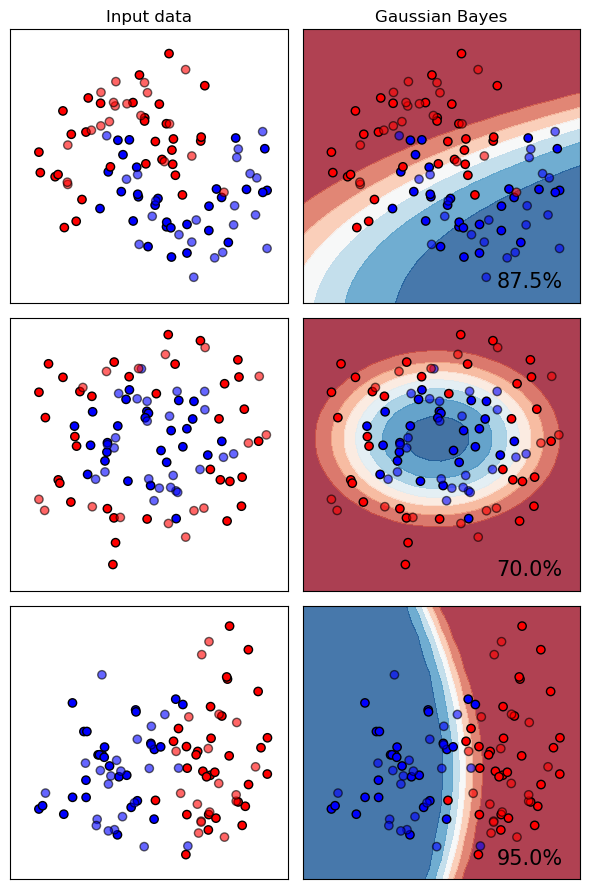

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB,ComplementNB
 
h = .02
# 模型的名字
names = ["Multinomial","Gaussian","Bernoulli","Complement"]
# 创建我们的模型对象
classifiers = [MultinomialNB(),GaussianNB(),BernoulliNB(),ComplementNB()]
# 创建分类数据集
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
random_state=1, n_clusters_per_class=1)
# 月亮刑数据
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)
 
datasets = [make_moons(noise=0.3, random_state=0),
make_circles(noise=0.2, factor=0.5, random_state=1),
linearly_separable
]
# 创建画布
figure = plt.figure(figsize=(6, 9))
i = 1
 
for ds_index, ds in enumerate(datasets):
    X, y = ds
#     标准化数据集
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4,random_state=42)
#     对画布画网格线
    x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    array1,array2 = np.meshgrid(np.arange(x1_min, x1_max, 0.2),
    np.arange(x2_min, x2_max, 0.2))
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), 2, i)
    if ds_index == 0:
        ax.set_title("Input data")
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
    cmap=cm_bright,edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test,
    cmap=cm_bright, alpha=0.6,edgecolors='k')
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    ax = plt.subplot(len(datasets),2,i)
    clf = GaussianNB().fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    Z = clf.predict_proba(np.c_[array1.ravel(),array2.ravel()])[:, 1]
    Z = Z.reshape(array1.shape)
    ax.contourf(array1, array2, Z, cmap=cm, alpha=.8)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
    edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
    edgecolors='k', alpha=0.6)
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    ax.set_xticks(())
    ax.set_yticks(())
    if ds_index == 0:
        ax.set_title("Gaussian Bayes")
    ax.text(array1.max() - .3, array2.min() + .3, ('{:.1f}%'.format(score*100)),
    size=15, horizontalalignment='right')
    i += 1
plt.tight_layout()
plt.show()